# Chapter 2: Accessing Text Corpora and Lexical Resources

In [1]:
import nltk
from nltk import FreqDist
from nltk.corpus import gutenberg

In [2]:
nltk.corpus.gutenberg.fileids()
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print(len(emma))

192427


The format strings are not in the book, I just decided to display them like that because it's easier to follow. And I'm shocked that the average of sentences are so high in these texts. ---- It's with spaces and punctuation!! 

In [3]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sent = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sent), int(num_words/num_vocab), fileid)
    print('There are {chars} characters, {words} words, {sent} sentences and {vocab} distinct words in {text}'.format(chars=num_chars, words=num_words, text=fileid, sent=num_sent, vocab=num_vocab))
    print('The average word length is {0:.2f}.'.format(num_chars/num_words))
    print('The average number of words in a sentence is {0:.2f}.'.format(num_words/num_sent))
    print('The lexical diversity is {0:.2f}.'.format(num_words/num_vocab))
    print('--------')

4 24 26 austen-emma.txt
There are 887071 characters, 192427 words, 7752 sentences and 7344 distinct words in austen-emma.txt
The average word length is 4.61.
The average number of words in a sentence is 24.82.
The lexical diversity is 26.20.
--------
4 26 16 austen-persuasion.txt
There are 466292 characters, 98171 words, 3747 sentences and 5835 distinct words in austen-persuasion.txt
The average word length is 4.75.
The average number of words in a sentence is 26.20.
The lexical diversity is 16.82.
--------
4 28 22 austen-sense.txt
There are 673022 characters, 141576 words, 4999 sentences and 6403 distinct words in austen-sense.txt
The average word length is 4.75.
The average number of words in a sentence is 28.32.
The lexical diversity is 22.11.
--------
4 33 79 bible-kjv.txt
There are 4332554 characters, 1010654 words, 30103 sentences and 12767 distinct words in bible-kjv.txt
The average word length is 4.29.
The average number of words in a sentence is 33.57.
The lexical diversity is

In [4]:
macbeth_sents = gutenberg.sents('shakespeare-macbeth.txt')
longest_len = max([len(s) for s in macbeth_sents])
print([s for s in macbeth_sents if len(s) == longest_len])

[['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well', 'hee', 'deserues', 'that', 'Name', ')', 'Disdayning', 'Fortune', ',', 'with', 'his', 'brandisht', 'Steele', ',', 'Which', 'smoak', "'", 'd', 'with', 'bloody', 'execution', '(', 'Like', 'Valours', 'Minion', ')', 'caru', "'", 'd', 'out', 'his', 'passage', ',', 'Till', 'hee', 'fac', "'", 'd', 'the', 'Slaue', ':', 'Which', 'neu', "'", 'r', 's

In [5]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65])

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb


In [6]:
from nltk.corpus import brown 
print(brown.categories())
brown.words(categories='news')

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [7]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for modal in modals:
    print('{} -- {}'.format(modal, fdist[modal]))

can -- 94
could -- 87
may -- 93
might -- 38
must -- 53
will -- 389


In [8]:
mystery_text = brown.words(categories='mystery')
fdist_mys = nltk.FreqDist([w.lower() for w in mystery_text])
wh_words = ['what', 'who', 'whom', 'whose', 'why', 'where', 'when']
for wh_word in wh_words:
    print('{} -- {}'.format(wh_word, fdist_mys[wh_word]))


what -- 146
who -- 94
whom -- 3
whose -- 1
why -- 52
where -- 71
when -- 154


In [9]:
# the same as above but the function for all categories in the corpus
for category in brown.categories():
    text = brown.words(categories=category) 
    fdist_text = nltk.FreqDist([w.lower() for w in text])
    print('-----')
    print(category.upper())
    for wh_word in wh_words:
        print('{} -- {}'.format(wh_word, fdist_text[wh_word]))
    

-----
ADVENTURE
what -- 149
who -- 95
whom -- 2
whose -- 2
why -- 30
where -- 58
when -- 173
-----
BELLES_LETTRES
what -- 314
who -- 461
whom -- 51
whose -- 60
why -- 50
where -- 114
when -- 345
-----
EDITORIAL
what -- 113
who -- 177
whom -- 9
whose -- 11
why -- 23
where -- 45
when -- 123
-----
FICTION
what -- 186
who -- 112
whom -- 8
whose -- 11
why -- 42
where -- 89
when -- 192
-----
GOVERNMENT
what -- 58
who -- 77
whom -- 3
whose -- 14
why -- 6
where -- 48
when -- 68
-----
HOBBIES
what -- 108
who -- 104
whom -- 2
whose -- 14
why -- 17
where -- 77
when -- 164
-----
HUMOR
what -- 46
who -- 49
whom -- 4
whose -- 8
why -- 13
where -- 16
when -- 62
-----
LEARNED
what -- 177
who -- 214
whom -- 12
whose -- 38
why -- 24
where -- 126
when -- 312
-----
LORE
what -- 162
who -- 261
whom -- 17
whose -- 32
why -- 34
where -- 111
when -- 250
-----
MYSTERY
what -- 146
who -- 94
whom -- 3
whose -- 1
why -- 52
where -- 71
when -- 154
-----
NEWS
what -- 95
who -- 268
whom -- 8
whose -- 22
why -- 14
wh

In [10]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [11]:
# same as above but for wh-words and all categories (so the loop above but in the table)
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = brown.categories()
cfd.tabulate(conditions=genres, samples=wh_words) 

                 what   who  whom whose   why where  when 
      adventure   110    91     2     2    13    53   126 
 belles_lettres   244   452    50    59    36   107   252 
      editorial    84   172     8    11    10    40   103 
        fiction   128   103     7    11    18    76   133 
     government    43    74     3    14     6    46    56 
        hobbies    78   103     2    14    10    72   119 
          humor    36    48     4     8     9    15    52 
        learned   141   212    12    38    20   118   227 
           lore   130   259    17    32    25    97   182 
        mystery   109    80     3     1    25    59   114 
           news    76   268     8    22     9    58   128 
       religion    64   100    11     9    14    20    53 
        reviews    44   128     9    17     9    25    54 
        romance   121    89     5     9    34    54   126 
science_fiction    27    13     2     3     4    10    21 


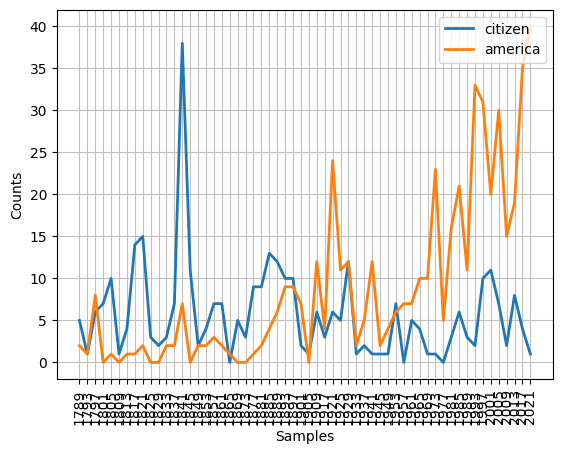

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
from nltk.corpus import inaugural
cfd1 = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)
cfd1.plot()

In [13]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
genres = brown.categories()
cfd3 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
cfd3.tabulate(conditions=genres, samples=weekdays) # same as cfd3.tabulate(samples=weekdays)  
cfd3.tabulate(conditions=['news', 'romance'], samples=weekdays)

                   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
      adventure         1         0         0         0         0         0         0 
 belles_lettres         0         1         1         2         2         0         4 
      editorial         1         0         1         1         0         3         4 
        fiction         0         2         1         2         1         3         3 
     government         3         1         0         1         0         4         9 
        hobbies         1         0         0         1         3         0         2 
          humor         1         0         0         0         0         3         0 
        learned         0         4         3         1         3         1         1 
           lore         0         1         1         1         2         2         5 
        mystery         5         2         1         1         2         2         4 
           news        54        43        

In [14]:
from nltk.corpus import wordnet as wn 
print(wn.synsets('motorcar'))
print(wn.synsets('car'))
print(wn.synset('car.n.01').lemma_names())
print(wn.synset('car.n.01').definition())
print(wn.synset('car.n.04').definition())
print(wn.synset('car.n.04').lemmas())
print(wn.synsets('dish'))

for synset in wn.synsets('dish'):
    print(synset.lemma_names())

[Synset('car.n.01')]
[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
a motor vehicle with four wheels; usually propelled by an internal combustion engine
where passengers ride up and down
[Lemma('car.n.04.car'), Lemma('car.n.04.elevator_car')]
[Synset('dish.n.01'), Synset('dish.n.02'), Synset('dish.n.03'), Synset('smasher.n.02'), Synset('dish.n.05'), Synset('cup_of_tea.n.01'), Synset('serve.v.06'), Synset('dish.v.02')]
['dish']
['dish']
['dish', 'dishful']
['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
['dish', 'dish_aerial', 'dish_antenna', 'saucer']
['cup_of_tea', 'bag', 'dish']
['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']
['dish']


### Exercises  
#### 1. Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [15]:
list_animals = ['cat', 'dog', 'horse', 'hedgehog', 'sheep', 'mouse', 'elephant', 'panda']
for animal in list_animals:
    print("I like " + animal + "!")

print([animal.upper() for animal in list_animals])
print([animal[:3] for animal in list_animals])
print([animal[2:] for animal in list_animals])
print(sorted(list_animals))

def odd_animals(my_list): 
    odd_ids = my_list[1::2]
    return odd_ids

print(odd_animals(list_animals))

list_animals.append('wolf')
print(list_animals)

I like cat!
I like dog!
I like horse!
I like hedgehog!
I like sheep!
I like mouse!
I like elephant!
I like panda!
['CAT', 'DOG', 'HORSE', 'HEDGEHOG', 'SHEEP', 'MOUSE', 'ELEPHANT', 'PANDA']
['cat', 'dog', 'hor', 'hed', 'she', 'mou', 'ele', 'pan']
['t', 'g', 'rse', 'dgehog', 'eep', 'use', 'ephant', 'nda']
['cat', 'dog', 'elephant', 'hedgehog', 'horse', 'mouse', 'panda', 'sheep']
['dog', 'hedgehog', 'mouse', 'panda']
['cat', 'dog', 'horse', 'hedgehog', 'sheep', 'mouse', 'elephant', 'panda', 'wolf']


#### 2. Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

In [16]:
persuasion = nltk.corpus.gutenberg.words('austen-persuasion.txt')
tokens_persuasion = len(persuasion)
words_persuasion = set([w.lower() for w in persuasion])
words_persuasion_clean = set([w.lower() for w in persuasion if w.isalpha() == True])

print('The text austen-persuasion.txt has {} tokens in total.'.format(tokens_persuasion))
print('This amount of words and punctuation -- {} -- are in the text.'.format(len(words_persuasion)))
print('This amount of words -- {} -- are in the text.'.format(len(words_persuasion_clean)))

The text austen-persuasion.txt has 98171 tokens in total.
This amount of words and punctuation -- 5835 -- are in the text.
This amount of words -- 5739 -- are in the text.


#### 3. Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [17]:
from nltk.corpus import brown 
from nltk.corpus import webtext
print(brown.categories())
print(brown.words(categories = 'editorial'))
print(brown.words(categories = 'religion')) 

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['Assembly', 'session', 'brought', 'much', 'good', ...]
['As', 'a', 'result', ',', 'although', 'we', 'still', ...]


#### 4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

                       men  women people 
    1945-Truman.txt      2      2     10 
    1946-Truman.txt     12      7     49 
    1947-Truman.txt      7      2     12 
    1948-Truman.txt      4      1     22 
    1949-Truman.txt      2      1     15 
    1950-Truman.txt      6      2     15 
    1951-Truman.txt      8      2      9 
1953-Eisenhower.txt      3      0     17 
1954-Eisenhower.txt      2      0     15 
1955-Eisenhower.txt      4      0     26 
1956-Eisenhower.txt      2      2     30 
1957-Eisenhower.txt      5      2     11 
1958-Eisenhower.txt      2      1     19 
1959-Eisenhower.txt      4      1     11 
1960-Eisenhower.txt      2      0     10 
   1961-Kennedy.txt      6      0     10 
   1962-Kennedy.txt      6      2     10 
   1963-Johnson.txt      0      0      3 
   1963-Kennedy.txt      8      5     12 
   1964-Johnson.txt      3      1      3 
 1965-Johnson-1.txt      7      0     16 
 1965-Johnson-2.txt     11      3     14 
   1966-Johnson.txt     12      1 

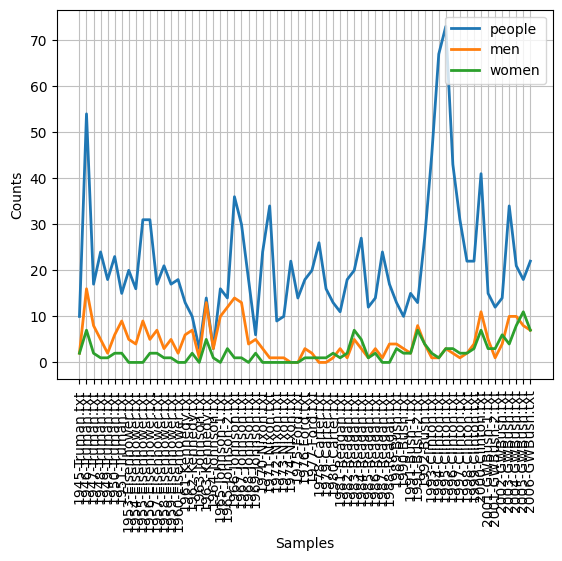

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
from nltk.corpus import state_union
task_words = ['men', 'women', 'people']

files = state_union.fileids()
counting = nltk.ConditionalFreqDist(
    (file, word)
    for file in state_union.fileids()
    for word in state_union.words(fileids=file)
) 
counting.tabulate(conditions=files, samples=task_words) # nice table, I'd like a graph 

import matplotlib as plt
counting_plot = nltk.ConditionalFreqDist(
    (target, fileid)
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in task_words
    if w.lower().startswith(target) # I don't get why I need this line 
)
counting_plot.plot()

#### 5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms(). 

In [19]:
from nltk.corpus import wordnet as wn 
cats_synsets = wn.synsets('cat')
for meaning in cats_synsets: 
    print('{} : {}'.format(meaning, meaning.definition()))
    print('{} : {}'.format(meaning, meaning.hyponyms()))
    print('------')

book_synsets = wn.synsets('book')
for meaning in book_synsets: 
    print('Definition: {}'.format(meaning.definition()))
    print('Hyponyms : {}'.format(meaning.hyponyms()))
    print('Member meronyms : {}'.format(meaning.member_meronyms()))
    print('Part meronyms : {}'.format(meaning.part_meronyms()))
    print('Substance meronyms : {}'.format(meaning.substance_meronyms()))
    print('Member holonyms : {}'.format(meaning.member_holonyms()))
    print('Part holonyms : {}'.format(meaning.part_holonyms()))
    print('Substance holonyms : {}'.format(meaning.substance_holonyms()))
    print('------')


Synset('cat.n.01') : feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
Synset('cat.n.01') : [Synset('domestic_cat.n.01'), Synset('wildcat.n.03')]
------
Synset('guy.n.01') : an informal term for a youth or man
Synset('guy.n.01') : [Synset('sod.n.04')]
------
Synset('cat.n.03') : a spiteful woman gossip
Synset('cat.n.03') : []
------
Synset('kat.n.01') : the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
Synset('kat.n.01') : []
------
Synset('cat-o'-nine-tails.n.01') : a whip with nine knotted cords
Synset('cat-o'-nine-tails.n.01') : []
------
Synset('caterpillar.n.02') : a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
Synset('caterpillar.n.02') : []
------
Synset('big_cat.n.01') : any of several large cats typically able to roar and living in the wild
Synset('big_cat.n.01') : [Synset('c

#### 7. According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html 

In [20]:
however = ['however', 'However']
cfd.tabulate(conditions=genres, samples=however) 

                however However 
      adventure       6       1 
 belles_lettres      82      16 
      editorial      16       8 
        fiction      10       2 
     government      21      16 
        hobbies      25      16 
          humor       7       3 
        learned      88      59 
           lore      50      21 
        mystery       4       3 
           news      37      12 
       religion      13       6 
        reviews      16       5 
        romance       2       0 
science_fiction       5       2 


#### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4). 

['female.txt', 'male.txt']


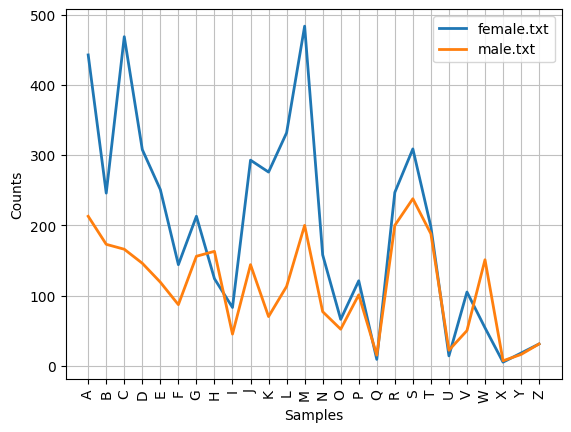

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
from nltk.corpus import names 
print(names.fileids())
letters_names = nltk.ConditionalFreqDist(
    (fileid, name1[0])
    for fileid in names.fileids()
    for name1 in names.words(fileid)
)
letters_names.plot()

#### 9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility? 

In [22]:
blake_poems = nltk.corpus.gutenberg.words('blake-poems.txt')
milton_paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')

print('Tokens in milton-paradise: {}, in blake_poem: {}'.format(len(set(milton_paradise)), len(set(blake_poems))))
print('Distinct words in milton-paradise: {}'.format(len(set([w.lower() for w in milton_paradise if w.isalpha()]))))
print('Distinct words in blake_poems: {}'.format(len(set([w.lower() for w in blake_poems if w.isalpha()]))))

Tokens in milton-paradise: 10751, in blake_poem: 1820
Distinct words in milton-paradise: 8975
Distinct words in blake_poems: 1510


#### 10. Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.
Surprisingly, it's a peculiar question. I had no idea about Vicky, but I love this actor who portraits her, Matt Lucas. 
Well, I know a couple of things about the Zipf's law, so I was not surprised. 

#### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?
Hard to tell anything solid because, I guess, I need proportions, these numbers are absolute. It's necessary to measure length of each text, count vocabulary diversity, etc. 

Judging by this raw table, the genre that used modals the most is hobbies. I have to think why. 

In [23]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


#### 10. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [24]:
entries = nltk.corpus.cmudict.entries() 
print(len(entries))
print(entries[1:5])

words_only = []
for entry in entries:
    words_only.append(entry[0])

len_words_only = len(words_only) # 133737, same as print(len(entries))
len_set_words_only = len(set(words_only)) # 123455
difference_len_set = len(words_only)- len(set(words_only)) # 10282
print(difference_len_set/len_words_only * 100) # 7.688223902136282, idk if this is correct

def find_duplicates(lst): # googled and chatGPT
    seen = set()
    duplicates = set() # duplicates = []
    
    for item in lst:
        if item in seen:
           duplicates.add(item) # duplicates.append(item)
        else:
            seen.add(item)
    
    return list(duplicates)

duplicates_list = find_duplicates(words_only)
len_duplicates = len(duplicates_list) 
propor_duplicates = len_duplicates/len(words_only) * 100

print(propor_duplicates) 
# this should be correct now, though it's not that different from above
# if I change duplicates to a list, the number is the same as above -- 7.688223902136282
# if it's a set it's a bit less -- 6.909830488196983

133737
[('a.', ['EY1']), ('a', ['EY1']), ('a42128', ['EY1', 'F', 'AO1', 'R', 'T', 'UW1', 'W', 'AH1', 'N', 'T', 'UW1', 'EY1', 'T']), ('aaa', ['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1'])]
7.688223902136282
6.909830488196983


#### 13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n'). NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets.

In [25]:
all_synset = wn.all_synsets('n')
all_synset_len = 155287
# motorcar = wn.synset('car.n.01')
# types_of_motorcar = motorcar.hyponyms()
# print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))
# print(wn.synsets('dog'))

no_hypo = [word.name() for word in all_synset if len(word.hyponyms()) == 0]
print('Words with no hyponyms: {}'.format(len(no_hypo)))
print('Proportion of words with no hyponyms: {}'.format(len(no_hypo)/all_synset_len * 100))
print(no_hypo[32:40])

Words with no hyponyms: 65422
Proportion of words with no hyponyms: 42.12973397644362
['exhumation.n.01', 'mitzvah.n.02', 'rally.n.02', 'tour_de_force.n.01', 'overachievement.n.01', 'underachievement.n.01', 'record.n.04', 'fait_accompli.n.01']


#### 14. Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

Well, I've technically done it already. 

In [26]:
def supergloss(s):
    s_synsets = wn.synsets(s)
    
    for item in s_synsets:
        s_hypo = [lemma.name() for synset in item.hyponyms() for lemma in synset.lemmas()]
        s_hyper = [lemma.name() for synset in item.hypernyms() for lemma in synset.lemmas()]

        print('Definition of {}: {}'.format(s, item.definition()))
        
        print('Hyponyms of {}: {}'.format(s, s_hypo))
        for word in item.hyponyms():
            print('{} definition: {} '.format(word.lemma_names(), word.definition()))
            
        print('Hypernyms of {}: {}'.format(s, s_hyper))
        for word in item.hypernyms():
            print('{} definition: {} '.format(word.lemma_names(), word.definition()))
            
        print('-------')
    
supergloss('daughter')
    

Definition of daughter: a female human offspring
Hyponyms of daughter: ["mother's_daughter"]
["mother's_daughter"] definition: a daughter who is favored by and similar to her mother 
Hypernyms of daughter: ['female_offspring']
['female_offspring'] definition: a child who is female 
-------


#### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [27]:
brown_all = brown.words()
words_in_brown = nltk.FreqDist([w.lower() for w in brown_all])
words_3 = [word for word in words_in_brown if words_in_brown[word] > 3]
    

#### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?
Steps to take: 
1. create a function that counts tokens, types and ratio
2. apply this function to each category in the Brown Corpus
3. create a table with the output 


In [28]:
from tabulate import tabulate
def tokens_type_ratio(category_corpus):
    num_types_category = len(set(category_corpus))
    num_tokens_category = len(category_corpus)
    ratio_category = num_types_category / num_tokens_category
    return num_tokens_category, num_types_category, ratio_category

result = []
for category in brown.categories():
    result.append((category,) + tokens_type_ratio(brown.words(categories = category)))
    # In the line result.append((category,) + type_tokens(brown.words(categories=category))), (category,) is a tuple containing a single element, which is the category. The comma after category is necessary to indicate that it's a tuple with one element. This is a Python syntax quirk; without the comma, Python would interpret the expression as just a string rather than a tuple. So, (category,) ensures that category is treated as a single-element tuple rather than just a string. This is done to maintain consistency when adding the category along with the results of type_tokens() function call to the result list.
    
headers = ['Category', 'Tokens', 'Types', 'Ratio']
print(tabulate(result, headers=headers))

Category           Tokens    Types      Ratio
---------------  --------  -------  ---------
adventure           69342     8874  0.127974
belles_lettres     173096    18421  0.106421
editorial           61604     9890  0.160542
fiction             68488     9302  0.135819
government          70117     8181  0.116676
hobbies             82345    11935  0.144939
humor               21695     5017  0.231251
learned            181888    16859  0.0926889
lore               110299    14503  0.131488
mystery             57169     6982  0.122129
news               100554    14394  0.143147
religion            39399     6373  0.161755
reviews             40704     8626  0.21192
romance             70022     8452  0.120705
science_fiction     14470     3233  0.223428


#### 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [29]:
from nltk.corpus import stopwords
from nltk.book import *

def freq_50(text):
    words_list = FreqDist(w for w in text if w.lower() not in stopwords.words('english') and w.isalpha())
    return words_list.most_common(50)

emma = nltk.corpus.gutenberg.words('austen-emma.txt')
freq_50(emma)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[('Mr', 1153),
 ('Emma', 865),
 ('could', 825),
 ('would', 815),
 ('Mrs', 699),
 ('Miss', 592),
 ('must', 564),
 ('Harriet', 506),
 ('said', 484),
 ('much', 478),
 ('Weston', 439),
 ('one', 413),
 ('every', 398),
 ('thing', 398),
 ('Knightley', 389),
 ('Elton', 385),
 ('think', 380),
 ('little', 354),
 ('never', 347),
 ('good', 340),
 ('know', 337),
 ('might', 322),
 ('well', 315),
 ('Woodhouse', 313),
 ('say', 308),
 ('Jane', 301),
 ('time', 272),
 ('quite', 269),
 ('great', 263),
 ('Fairfax', 241),
 ('nothing', 237),
 ('always', 235),
 ('man', 233),
 ('thought', 226),
 ('Churchill', 223),
 ('soon', 221),
 ('see', 220),
 ('dear', 217),
 ('may', 213),
 ('shall', 212),
 ('without', 211),
 ('first', 209),
 ('Frank', 208),
 ('father', 207),
 ('sure', 204),
 ('made', 199),
 ('like', 199),
 ('body', 193),
 ('day', 190),
 ('young', 190)]

#### 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [30]:
def bigrams_freq_50(text):
    bigrams_list = nltk.bigrams(w for w in text if w.lower() not in stopwords.words('english') and w.isalpha())
    bigrams_list_freq = FreqDist(bigrams_list)
    return bigrams_list_freq.most_common(50)

emma = nltk.corpus.gutenberg.words('austen-emma.txt')
bigrams_freq_50(emma)

[(('Mr', 'Knightley'), 299),
 (('Mrs', 'Weston'), 256),
 (('Mr', 'Elton'), 229),
 (('Miss', 'Woodhouse'), 173),
 (('Mr', 'Weston'), 167),
 (('Frank', 'Churchill'), 151),
 (('Mrs', 'Elton'), 150),
 (('Mr', 'Woodhouse'), 135),
 (('Miss', 'Fairfax'), 125),
 (('every', 'thing'), 118),
 (('Miss', 'Bates'), 113),
 (('Jane', 'Fairfax'), 111),
 (('every', 'body'), 92),
 (('young', 'man'), 84),
 (('said', 'Emma'), 65),
 (('great', 'deal'), 64),
 (('Emma', 'could'), 62),
 (('Mrs', 'Goddard'), 59),
 (('Miss', 'Smith'), 58),
 (('John', 'Knightley'), 58),
 (('dare', 'say'), 51),
 (('Mr', 'Frank'), 50),
 (('Miss', 'Taylor'), 48),
 (('said', 'Mr'), 44),
 (('Mrs', 'Churchill'), 42),
 (('Mr', 'Mrs'), 39),
 (('Mr', 'Perry'), 39),
 (('Mr', 'Martin'), 38),
 (('Mrs', 'Cole'), 32),
 (('dear', 'Emma'), 31),
 (('Mrs', 'Bates'), 31),
 (('Harriet', 'Smith'), 31),
 (('Robert', 'Martin'), 31),
 (('Maple', 'Grove'), 31),
 (('Mr', 'John'), 30),
 (('Colonel', 'Campbell'), 28),
 (('cried', 'Emma'), 27),
 (('Mr', 'Dix

#### 19. Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.
I like time of the year words a lot in this table. It's a bit problematic for 'fall' because it's also a verb (fell, fall, fall). Interestingly, science fiction, religion, reviews and humor have almost no mentions of the times of the year. 

In [31]:
time_year = ['winter', 'spring', 'summer', 'fall', 'autumn']
genres = brown.categories()
cfd4 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
cfd4.tabulate(conditions=genres, samples=time_year) 

                winter spring summer   fall autumn 
      adventure      1     12      8      8      0 
 belles_lettres     10     13     15     22      2 
      editorial      3     12     12      5      3 
        fiction      5      3     17      4      4 
     government      1      2      4     11      0 
        hobbies     13     17     16      4      2 
          humor      1      0      1      2      1 
        learned      9     18     13     21      1 
           lore     17      3     10     18      0 
        mystery      1      3      4      5      0 
           news      8     15     14     13      2 
       religion      0      1      4      6      0 
        reviews      1      1      4     10      7 
        romance      5      6      8      7      0 
science_fiction      1      1      2      0      0 


Idea: count all months but summarize them by the time of the year 
How: if a word in the set of winter months, then add it to the list, then sum all in the list? 

In [32]:
months = [['January', 'February', 'December'], ['March', 'April', 'May'], 
          ['June', 'July', 'August'], ['September', 'October', 'November']]

def time_year(time_year, category):
    count_time = FreqDist(w for w in brown.words(categories=category) if w in time_year)
    sum_time = sum(count_time.values())
    return sum_time

result_time_year = []

# puvodni 
# for category_corpus in brown.categories(): 
#     for year_time in months: 
#         result_time_year.append(time_year(year_time, category_corpus))
        
# updated with chatGPT
for category_corpus in brown.categories(): 
    category_counts = [category_corpus]
    for year_time in months: 
        category_counts.append(time_year(year_time, category_corpus))
    result_time_year.append(category_counts)
    
headers1 = ['winter months', 'spring months', 'summer months', 'fall months']
print(tabulate(result_time_year, headers=headers1))


                   winter months    spring months    summer months    fall months
---------------  ---------------  ---------------  ---------------  -------------
adventure                      2                2                4              2
belles_lettres                39               44               26             30
editorial                      4               19               10             21
fiction                        3                4                4              5
government                    32               50               61             33
hobbies                       12               21               14              5
humor                          0                1                2              2
learned                       18               21               21             16
lore                          13               22               18             19
mystery                        0                3                0              5
news            

#### 20. Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus. 

In [33]:
def word_freq(word, category): 
    freq_words = nltk.FreqDist(brown.words(categories=category))
    print('The word {} appears {} times in {} category in the Brown Corpus'.format(word.upper(), freq_words[word], category.upper()))

word_freq('leopard', 'government')
word_freq('leopard', 'news')
word_freq('children', 'mystery')
word_freq('whale', 'adventure')
word_freq('children', 'adventure')
word_freq('the', 'adventure')
word_freq('see', 'learned')

The word LEOPARD appears 0 times in GOVERNMENT category in the Brown Corpus
The word LEOPARD appears 0 times in NEWS category in the Brown Corpus
The word CHILDREN appears 6 times in MYSTERY category in the Brown Corpus
The word WHALE appears 0 times in ADVENTURE category in the Brown Corpus
The word CHILDREN appears 9 times in ADVENTURE category in the Brown Corpus
The word THE appears 3370 times in ADVENTURE category in the Brown Corpus
The word SEE appears 75 times in LEARNED category in the Brown Corpus


#### 21. Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.
Well, let's try: 
1. create a function that has two arguments -- text/word and guessed number of syllables 
2. if the guessed number is correct, output -- 'yay, correct'
3. if not correct, output -- 'nay, correct is {}'

Below works, but what if a word has multiple pronunciations? > Added another loop; also added a KeyError exception if a word is not in the dictionary

In [34]:
def syllables_guess(word, guess): 
    prondict = nltk.corpus.cmudict.dict()
    try:
        phonemes_word = prondict[word] # returns a nested list 
        if len(phonemes_word) == 1: # if there is only one way of pronunciation, i.e., one item in the nested list
            phonemes_word_list = sum(phonemes_word, []) # unnesting a nested list 
            syllables_word = [syll for syll in phonemes_word_list if syll.endswith('1') 
                              or syll.endswith('0') 
                              or syll.endswith('2')]
            if len(syllables_word) == guess:
                print('yay, correct! {} is pronounced as {} and has {} syllable(s)'.format(word.upper(), 
                                                                                           phonemes_word, 
                                                                                           len(syllables_word)))
            else: 
                print('nay, the correct number is {}. {} is pronounced as {}'.format(len(syllables_word),
                                                                                     word.upper(), 
                                                                                     phonemes_word))
        else: # if there are more than one way of pronunciation 
            ways_pronon = len(phonemes_word)
            syllab_list = []
            for pronon in phonemes_word: # for each way it counts syllables 
                #phonemes_word_list = sum(pronon, []) # I don't need it here because it's already a list 
                syllables_word = [syll for syll in pronon if syll.endswith('1') or 
                              syll.endswith('0') or syll.endswith('2')]
                syllab_list.append(len(syllables_word))
            print('There are {} ways of pronouncing {}: {} with these amounts of syllables {}.'.format(ways_pronon, word.upper(), phonemes_word, syllab_list))
    except KeyError: # if the word is not in the dictionary
        print('There is no word {} in the dictionary.'.format(word.upper()))
        
syllables_guess('cat', 4)
syllables_guess('dog', 1)
syllables_guess('fire', 2)
syllables_guess('electronics', 4)
syllables_guess('babushka', 3)
syllables_guess('koshka', 3)

nay, the correct number is 1. CAT is pronounced as [['K', 'AE1', 'T']]
yay, correct! DOG is pronounced as [['D', 'AO1', 'G']] and has 1 syllable(s)
There are 2 ways of pronouncing FIRE: [['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']] with these amounts of syllables [2, 1].
yay, correct! ELECTRONICS is pronounced as [['IH0', 'L', 'EH2', 'K', 'T', 'R', 'AA1', 'N', 'IH0', 'K', 'S']] and has 4 syllable(s)
yay, correct! BABUSHKA is pronounced as [['B', 'AH0', 'B', 'UH1', 'SH', 'K', 'AH0']] and has 3 syllable(s)
There is no word KOSHKA in the dictionary.


#### 22. Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.
I was super confused by this task and got the solution from https://stackoverflow.com/questions/31040525/insert-element-in-python-list-after-every-nth-element. I messed up the sentences and had to load them again.  

In [35]:
sent2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']
sent5 = ['I', 'have', 'a', 'problem', 'with', 'people', 'PMing', 'me', 'to', 'lol', 'JOIN']
sent3 = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
sent6 = ['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!']

def like_3(text):
    i = 3 
    mod_text = text
    while i < len(mod_text):
        mod_text.insert(i, 'like')
        i += (i+1)
    print(text, mod_text)
    
like_3(sent2)

['The', 'family', 'of', 'like', 'Dashwood', 'had', 'long', 'like', 'been', 'settled', 'in', 'Sussex', '.'] ['The', 'family', 'of', 'like', 'Dashwood', 'had', 'long', 'like', 'been', 'settled', 'in', 'Sussex', '.']


#### 23. Zipf's Law: 
Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

a. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line? 

b. Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

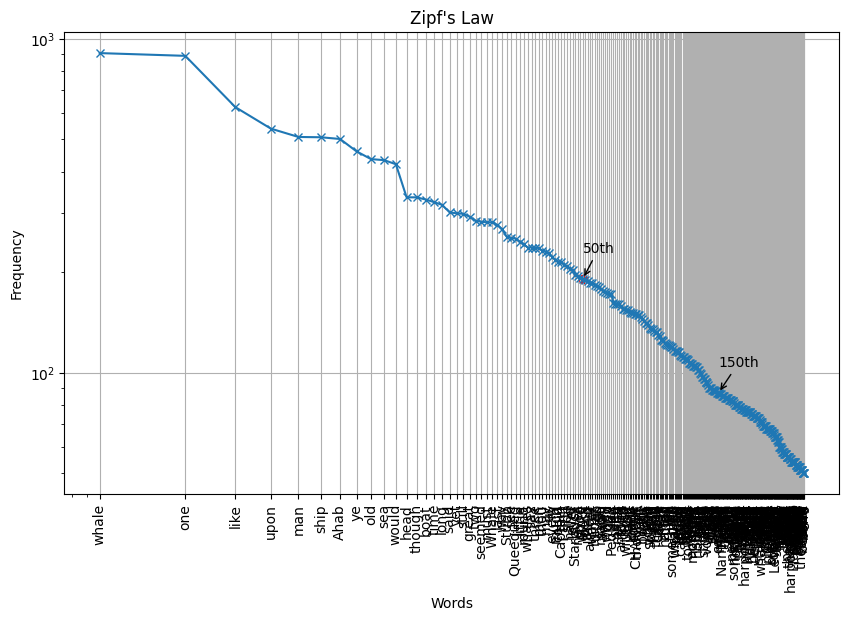

In [36]:
import matplotlib.pyplot as plt

def zipf_law(text):
    data = nltk.FreqDist(word for word in text if word.isalpha() and 
                         word.lower() not in stopwords.words('english'))
    data_150 = data.most_common(300) 
    
    # Plotting
    words = [word for word, _ in data_150]  # Extracting words from the frequency distribution
    frequencies = [count for _, count in data_150]

    plt.figure(figsize=(10, 6))
    plt.loglog(range(1, len(words) + 1), frequencies, marker='x')  # Using range instead of ranks
    
    # Highlighting the 50th and 150th words
    plt.scatter(50, frequencies[49], color='red', label='50th rank')
    plt.annotate("50th", xy=(50, frequencies[49]), xytext=(50, frequencies[49]*1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.scatter(150, frequencies[149], color='blue', label='150th rank')
    plt.annotate("150th", xy=(150, frequencies[149]), xytext=(150, frequencies[149]*1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    # Set x-axis ticks and labels to words
    plt.xticks(range(1, len(words) + 1), words, rotation=90)  # Rotate labels for better readability
    
    plt.title("Zipf's Law")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
zipf_law(text1)

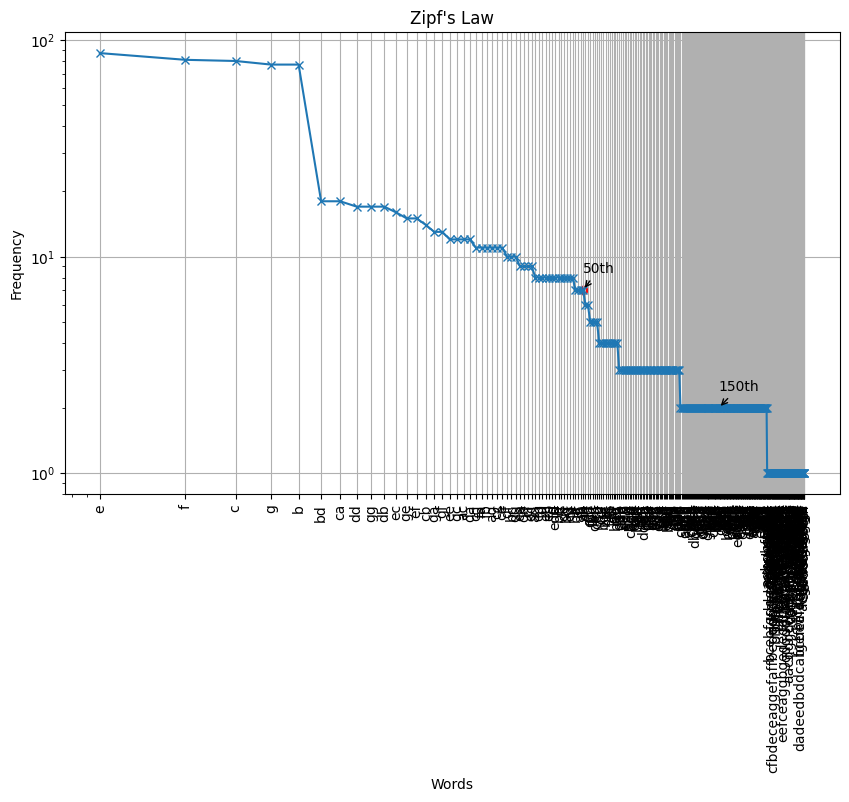

In [37]:
import random
from nltk.tokenize import word_tokenize

def text_me(): 
    return ''.join(random.choice(random.choice("abcdefg ")) for _ in range(44338))

random_text = word_tokenize(text_me())
zipf_law(random_text)


#### 24. Modify the text generation program in 2.2 further, to do the following tasks:
a. Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)

b. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.

c. Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [38]:
def generate_model(cfdist, word, num=10):
    # I need to create a list of random words, so the loop doesn't stuck 
    # "As you can see by inspecting the output, this simple approach to text generation tends to get stuck in loops; another method would be to randomly choose the next word from among the available words."
    random_list1 = []
    text_words = list(set(w for w in cfdist if w.isalpha() 
                          and w.lower() not in stopwords.words('english')))
    for i in range(30): 
        random_list1.append(random.choice(text_words))
    
    for i in range(num):
        print(word, end=' ')
        word = cfdist[random.choice(random_list1)].max()


In [39]:
text1 = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(w for w in text1 if w.isalpha() 
                       and w.lower() not in stopwords.words('english'))
cfd = nltk.ConditionalFreqDist(bigrams) # [_bigram-condition]
generate_model(cfd, 'living')

living thou officers said Dodanim lambs said knead Eri day 

In [40]:
brown_hobbies_text = nltk.corpus.brown.words(categories='hobbies')
brown_hobbies_bigrams = nltk.bigrams(w for w in brown_hobbies_text if w.isalpha() 
                                     and w.lower() not in stopwords.words('english'))
cfd_hobbies = nltk.ConditionalFreqDist(brown_hobbies_bigrams)
generate_model(cfd_hobbies, 'hobby')
generate_model(cfd_hobbies, 'paint')

hobby boatman table boatman toughest need carry dirt boatman salt paint cells one much tablespoonful cells keelson family sauces new 

In [41]:
def generate_model_two(cfdist1, cfdist2, word, num=10):
    # I need to create a list of random words, so the loop doesn't stuck 
    # "As you can see by inspecting the output, this simple approach to text generation tends to get stuck in loops; another method would be to randomly choose the next word from among the available words."
    random_list1 = []
    text1_words = list(set(w for w in cfdist1 if w.isalpha() 
                          and w.lower() not in stopwords.words('english')))
    text2_words = list(set(w for w in cfdist2 if w.isalpha() 
                          and w.lower() not in stopwords.words('english')))
    
    text_words = text1_words + text2_words
    for i in range(30): 
        random_list1.append(random.choice(text_words))
    
    for i in range(num):
        print(word, end=' ')
        word = cfdist1[random.choice(random_list1)].max()

In [42]:
# there is an error because I now have two texts and some words are not in both of them 
# so I drop it for now (idk if I even did the task right)
generate_model_two(cfd_hobbies, cfd, 'water') 

water Baptist 

ValueError: A FreqDist must have at least one sample before max is defined.

#### 25. Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [82]:
def find_language(word):
    languages_Latin1 = [lang for lang in nltk.corpus.udhr.fileids() if lang.endswith('-Latin1')]
    lang_word_in = []
    for lang in languages_Latin1:
        if word in nltk.corpus.udhr.words(lang):
            lang_word_in.append(lang)
    if len(lang_word_in) == 0:
        print(f'{word.upper()} is not found.')
    else: 
        print(f'{word.upper()} is found in {lang_word_in}')

find_language('peace')
find_language('Peace')
find_language('Mensch')
find_language('mensch') # issue 1: lower case 
# > not sure if I can solve this issue now. I have to lowercase all words in the lists and use a lowered word in the function 
find_language('кошка') # issue 2: empty list > solved 

PEACE is found in ['English-Latin1', 'NigerianPidginEnglish-Latin1', 'TokPisin-Latin1']
PEACE is not found.
MENSCH is found in ['German_Deutsch-Latin1']
MENSCH is not found.
КОШКА is not found.
